/var/folders/nt/xg5gfpkj58vgy8hqhlsslg_m0000gn/T/ipykernel_49750/66818662.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['date'] = pd.to_datetime(data_filtered['date'], errors='coerce')
/var/folders/nt/xg5gfpkj58vgy8hqhlsslg_m0000gn/T/ipykernel_49750/66818662.py:30: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data_filtered, x='country', y=attr, ax=axs[0, 0], palette="viridis", ci=None)
/var/folders/nt/xg5gfpkj58vgy8hqhlsslg_m0000gn/T/ipykernel_49750/66818662.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(d

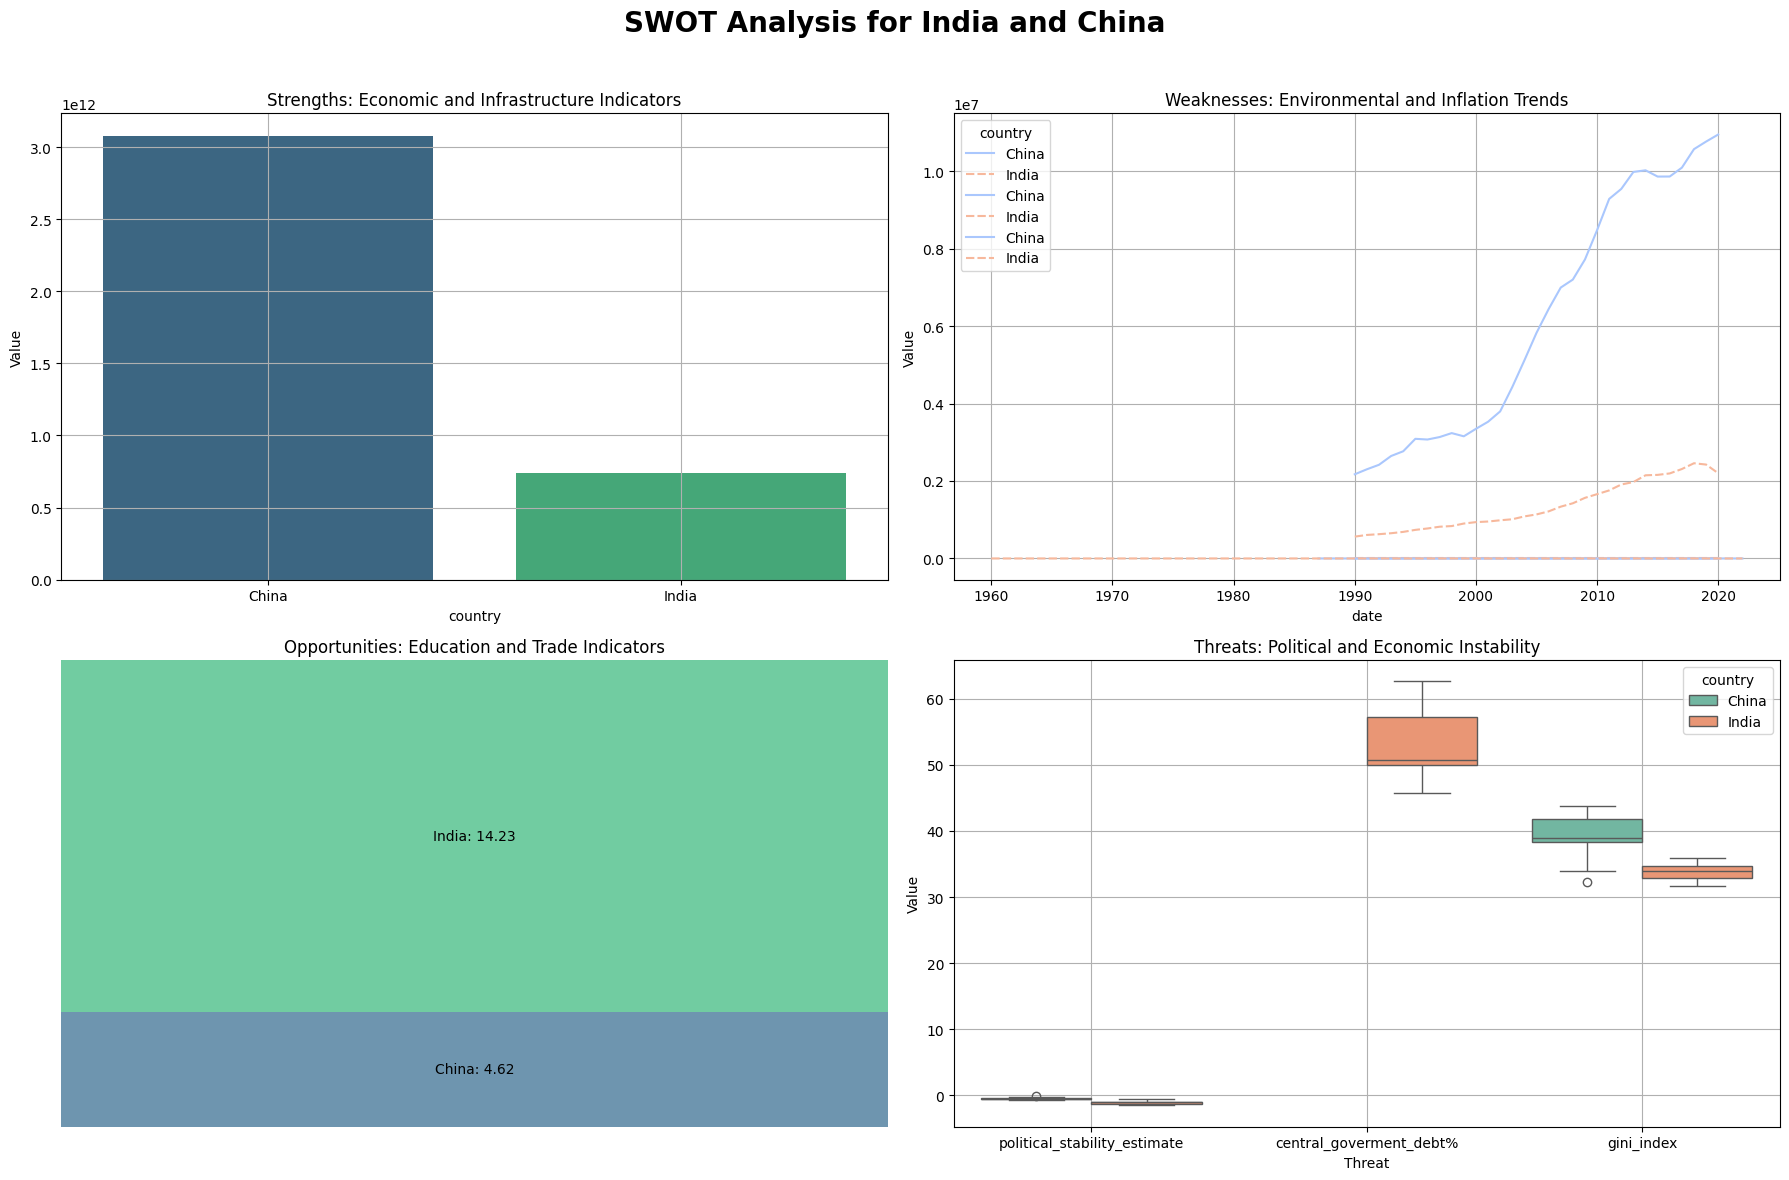

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import squarify  # For treemaps
import geopandas as gpd  # For world maps

# Load the dataset
file_path = 'world_bank_development_indicators_with_gdp_per_capita.csv'
data = pd.read_csv(file_path)

# Filter data for India and China
countries = ["India", "China"]
data_filtered = data[data['country'].isin(countries)]

# Convert 'date' column to datetime
data_filtered['date'] = pd.to_datetime(data_filtered['date'], errors='coerce')

# Define attributes for SWOT analysis
strengths = ['access_to_electricity%', 'individuals_using_internet%', 'GDP_current_US']
weaknesses = ['renewvable_energy_consumption%', 'inflation_annual%', 'CO2_emisions']
opportunities = ['trade_in_services%', 'research_and_development_expenditure%', 'government_expenditure_on_education%']
threats = ['political_stability_estimate', 'central_goverment_debt%', 'gini_index']

# Create a 2x2 grid for SWOT visualization
fig, axs = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle("SWOT Analysis for India and China", fontsize=20, fontweight='bold')

# 1. Strengths: Stacked Bar Chart
for attr in strengths:
    sns.barplot(data=data_filtered, x='country', y=attr, ax=axs[0, 0], palette="viridis", ci=None)
axs[0, 0].set_title("Strengths: Economic and Infrastructure Indicators")
axs[0, 0].set_ylabel("Value")
axs[0, 0].grid(True)

# 2. Weaknesses: Line Plot
for attr in weaknesses:
    sns.lineplot(data=data_filtered, x='date', y=attr, hue='country', ax=axs[0, 1], style='country', palette="coolwarm")
axs[0, 1].set_title("Weaknesses: Environmental and Inflation Trends")
axs[0, 1].set_ylabel("Value")
axs[0, 1].grid(True)

# 3. Opportunities: Treemap
latest_year = data_filtered['date'].dt.year.max()
data_latest = data_filtered[data_filtered['date'].dt.year == latest_year]
opportunity_data = data_latest[['country'] + opportunities].set_index('country').mean(axis=1)
sizes = opportunity_data.values
labels = [f"{country}: {size:.2f}" for country, size in zip(opportunity_data.index, sizes)]
axs[1, 0].axis("off")
squarify.plot(sizes=sizes, label=labels, ax=axs[1, 0], color=sns.color_palette("viridis", len(sizes)), alpha=0.7)
axs[1, 0].set_title("Opportunities: Education and Trade Indicators")

# 4. Threats: Boxplot
threats_data = data_filtered.melt(id_vars=['country'], value_vars=threats, var_name="Threat", value_name="Value")
sns.boxplot(data=threats_data, x='Threat', y='Value', hue='country', ax=axs[1, 1], palette="Set2")
axs[1, 1].set_title("Threats: Political and Economic Instability")
axs[1, 1].set_ylabel("Value")
axs[1, 1].grid(True)

# Adjust layout and display
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

/var/folders/nt/xg5gfpkj58vgy8hqhlsslg_m0000gn/T/ipykernel_49750/980905463.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['date'] = pd.to_datetime(data_filtered['date'], errors='coerce')


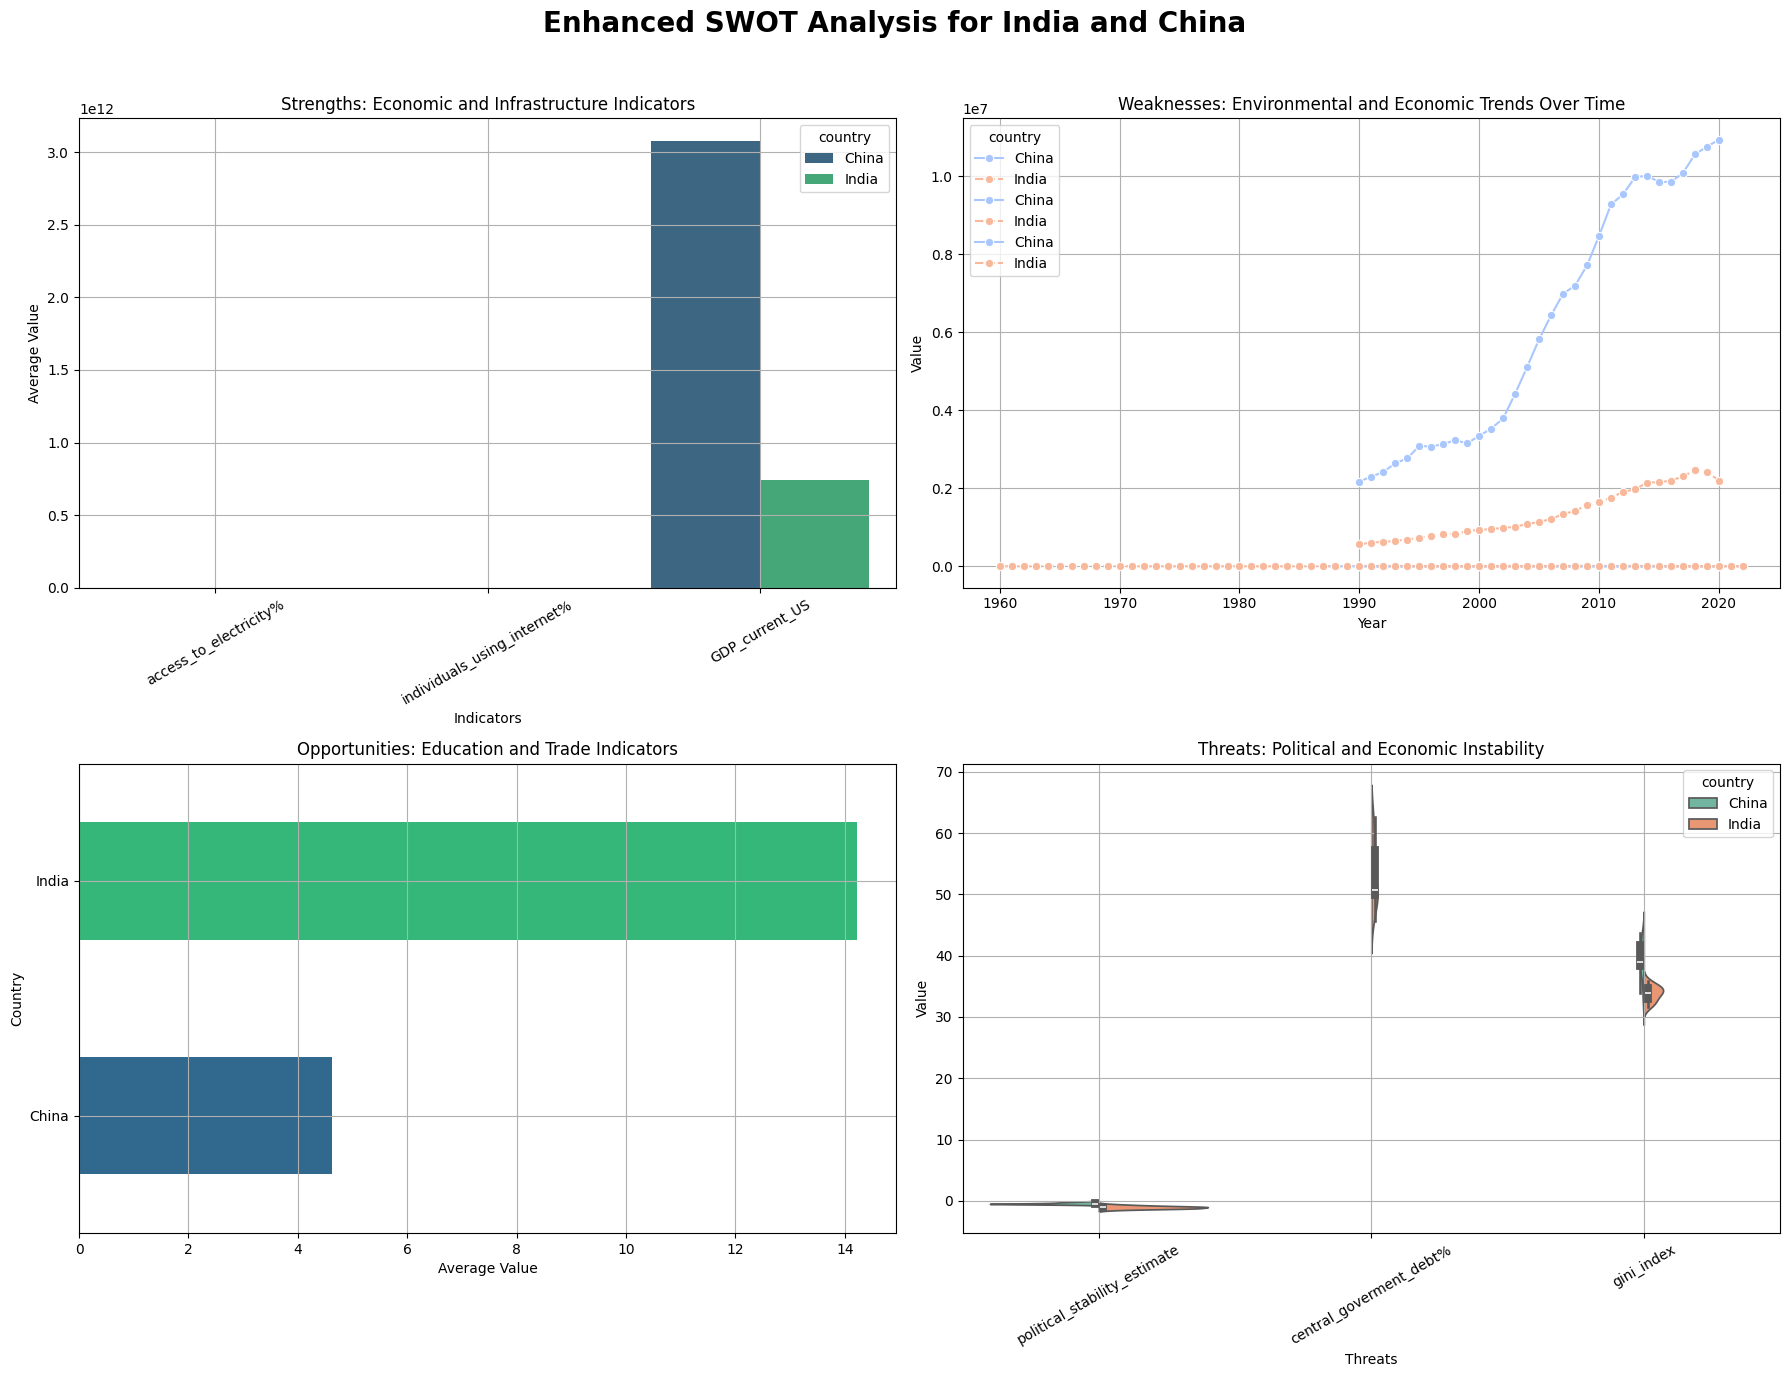

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'world_bank_development_indicators_with_gdp_per_capita.csv'
data = pd.read_csv(file_path)

# Filter data for India and China
countries = ["India", "China"]
data_filtered = data[data['country'].isin(countries)]

# Convert 'date' column to datetime
data_filtered['date'] = pd.to_datetime(data_filtered['date'], errors='coerce')

# Define attributes for SWOT analysis
strengths = ['access_to_electricity%', 'individuals_using_internet%', 'GDP_current_US']
weaknesses = ['renewvable_energy_consumption%', 'inflation_annual%', 'CO2_emisions']
opportunities = ['trade_in_services%', 'research_and_development_expenditure%', 'government_expenditure_on_education%']
threats = ['political_stability_estimate', 'central_goverment_debt%', 'gini_index']

# Create a 2x2 grid for SWOT visualization
fig, axs = plt.subplots(2, 2, figsize=(18, 14))
fig.suptitle("Enhanced SWOT Analysis for India and China", fontsize=20, fontweight='bold')

# 1. Strengths: Grouped Bar Chart
strength_data = data_filtered[['country'] + strengths].groupby('country').mean().reset_index()
strength_data_melted = strength_data.melt(id_vars='country', var_name='Strength', value_name='Value')
sns.barplot(data=strength_data_melted, x='Strength', y='Value', hue='country', ax=axs[0, 0], palette="viridis")
axs[0, 0].set_title("Strengths: Economic and Infrastructure Indicators")
axs[0, 0].set_ylabel("Average Value")
axs[0, 0].set_xlabel("Indicators")
axs[0, 0].tick_params(axis='x', rotation=30)
axs[0, 0].grid(True)

# 2. Weaknesses: Multi-line Plot with Markers
for attr in weaknesses:
    sns.lineplot(data=data_filtered, x='date', y=attr, hue='country', marker="o", ax=axs[0, 1], style='country', palette="coolwarm")
axs[0, 1].set_title("Weaknesses: Environmental and Economic Trends Over Time")
axs[0, 1].set_ylabel("Value")
axs[0, 1].set_xlabel("Year")
axs[0, 1].grid(True)

# 3. Opportunities: Horizontal Bar Chart
latest_year = data_filtered['date'].dt.year.max()
data_latest = data_filtered[data_filtered['date'].dt.year == latest_year]
opportunity_data = data_latest[['country'] + opportunities].set_index('country').mean(axis=1).sort_values()
opportunity_data.plot(kind='barh', color=sns.color_palette("viridis", len(opportunity_data)), ax=axs[1, 0])
axs[1, 0].set_title("Opportunities: Education and Trade Indicators")
axs[1, 0].set_xlabel("Average Value")
axs[1, 0].set_ylabel("Country")
axs[1, 0].grid(True)

# 4. Threats: Violin Plot
threats_data = data_filtered.melt(id_vars=['country'], value_vars=threats, var_name="Threat", value_name="Value")
sns.violinplot(data=threats_data, x='Threat', y='Value', hue='country', split=True, ax=axs[1, 1], palette="Set2")
axs[1, 1].set_title("Threats: Political and Economic Instability")
axs[1, 1].set_ylabel("Value")
axs[1, 1].set_xlabel("Threats")
axs[1, 1].tick_params(axis='x', rotation=30)
axs[1, 1].grid(True)

# Adjust layout and display
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [12]:
import pandas as pd
import geopandas as gpd
import plotly.express as px

# Step 1: Load the dataset (add error handling)
file_path = "gdppercapita.csv"

try:
    data = pd.read_csv(file_path, error_bad_lines=False)  # Skips problematic lines
    print(data.head())  # Print first few rows to check structure
except Exception as e:
    print(f"Error reading CSV: {e}")

# Step 2: Extract GDP per capita for India and China
india_data = data[data['country'] == 'India']
china_data = data[data['country'] == 'China']

# Step 3: Load GeoJSON files for Indian and Chinese states
india_geojson = gpd.read_file("india-osm.geojson")
china_geojson = gpd.read_file("china.json")

# Step 4: Merge GDP data with GeoJSON for India
india_geojson = india_geojson.merge(india_data, left_on="state_name", right_on="state")

# Plot India map
fig_india = px.choropleth(
    india_geojson,
    geojson=india_geojson.geometry,
    locations=india_geojson.index,
    color="gdp_per_capita",
    hover_name="state",
    title="India: GDP per Capita by State",
    color_continuous_scale="Viridis",
)
fig_india.update_geos(fitbounds="locations", visible=False)
fig_india.show()

# Step 5: Merge GDP data with GeoJSON for China
china_geojson = china_geojson.merge(china_data, left_on="state_name", right_on="state")

# Plot China map
fig_china = px.choropleth(
    china_geojson,
    geojson=china_geojson.geometry,
    locations=china_geojson.index,
    color="gdp_per_capita",
    hover_name="state",
    title="China: GDP per Capita by State",
    color_continuous_scale="Viridis",
)
fig_china.update_geos(fitbounds="locations", visible=False)
fig_china.show()


Error reading CSV: read_csv() got an unexpected keyword argument 'error_bad_lines'


Skipping field cp: unsupported OGR type: 3


KeyError: 'state'

/var/folders/nt/xg5gfpkj58vgy8hqhlsslg_m0000gn/T/ipykernel_49750/765377085.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['date'] = pd.to_datetime(data_filtered['date'], errors='coerce')


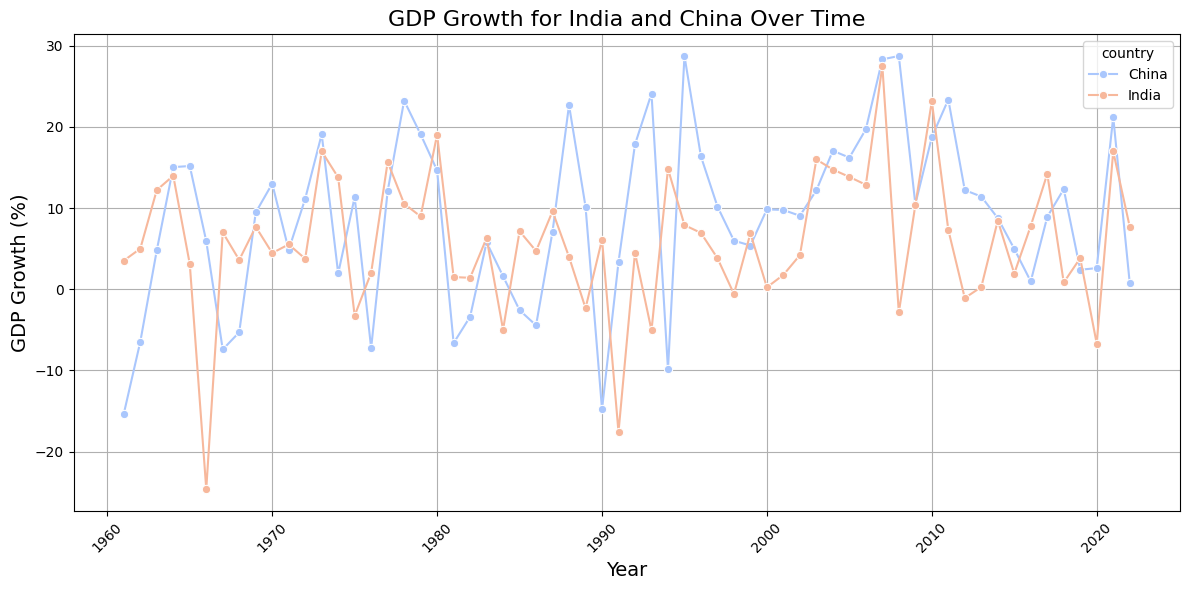

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'world_bank_development_indicators_with_gdp_per_capita.csv'
data = pd.read_csv(file_path)

# Filter data for India and China
countries = ["India", "China"]
data_filtered = data[data['country'].isin(countries)]

# Convert 'date' column to datetime
data_filtered['date'] = pd.to_datetime(data_filtered['date'], errors='coerce')

# Sort data by country and date to ensure correct calculation of GDP growth
data_filtered = data_filtered.sort_values(by=['country', 'date'])

# Calculate GDP growth as the percentage change in 'GDP_current_US' year over year
data_filtered['GDP_growth_%'] = data_filtered.groupby('country')['GDP per capita'].pct_change() * 100

# Plot GDP growth for India and China
plt.figure(figsize=(12, 6))
sns.lineplot(data=data_filtered, x='date', y='GDP_growth_%', hue='country', marker="o", palette="coolwarm")

# Add titles and labels
plt.title("GDP Growth for India and China Over Time", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("GDP Growth (%)", fontsize=14)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()


/var/folders/nt/xg5gfpkj58vgy8hqhlsslg_m0000gn/T/ipykernel_49750/2241873875.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['date'] = pd.to_datetime(data_filtered['date'], errors='coerce')


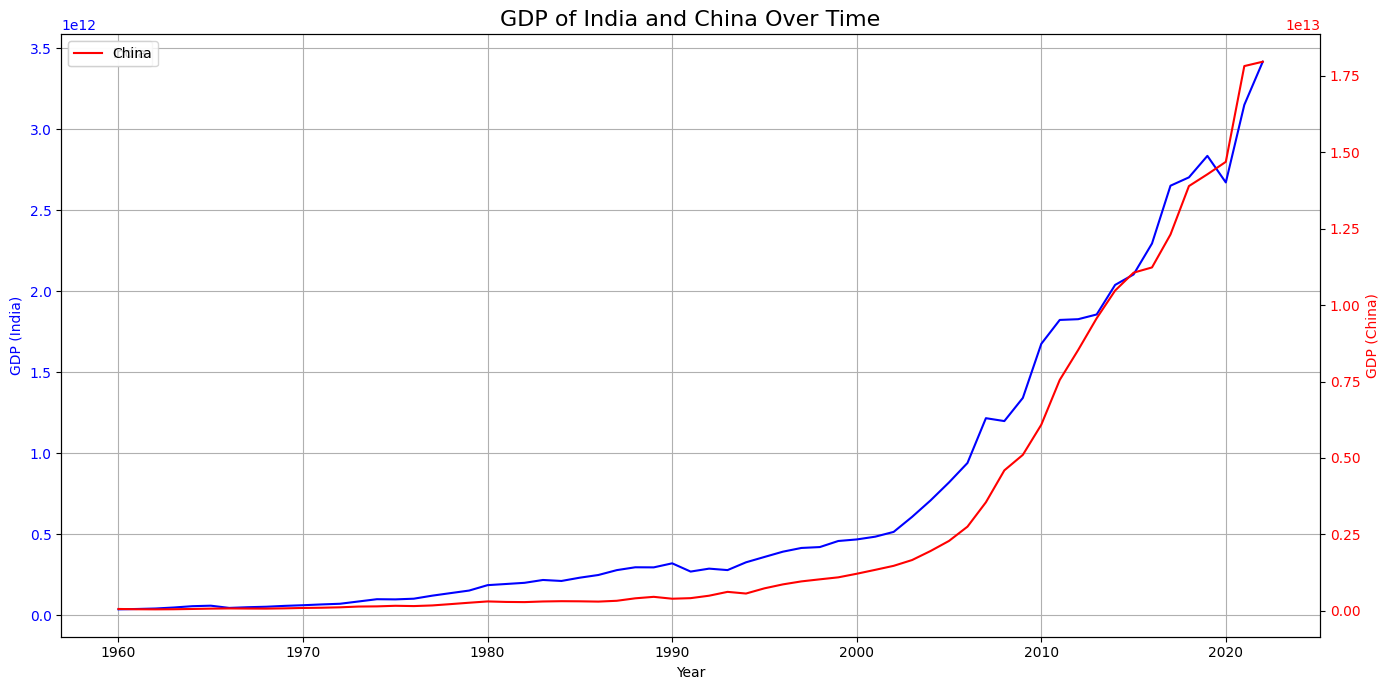

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'world_bank_development_indicators_with_gdp_per_capita.csv'
data = pd.read_csv(file_path)

# Filter data for India and China
countries = ["India", "China"]
data_filtered = data[data['country'].isin(countries)]

# Convert 'date' column to datetime
data_filtered['date'] = pd.to_datetime(data_filtered['date'], errors='coerce')

# Sort data by country and date to ensure correct calculation of GDP growth
data_filtered = data_filtered.sort_values(by=['country', 'date'])

# Plot GDP for both India and China on the same graph with two y-axes
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot GDP for India
sns.lineplot(data=data_filtered[data_filtered['country'] == 'India'], x='date', y='GDP_current_US', ax=ax1, label='India', color='blue')
ax1.set_xlabel("Year")
ax1.set_ylabel("GDP (India)", color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis to plot China
ax2 = ax1.twinx()
sns.lineplot(data=data_filtered[data_filtered['country'] == 'China'], x='date', y='GDP_current_US', ax=ax2, label='China', color='red')
ax2.set_ylabel("GDP (China)", color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Title and grid
plt.title("GDP of India and China Over Time", fontsize=16)
ax1.grid(True)
plt.tight_layout()

# Display plot
plt.show()


In [18]:
import pandas as pd
import numpy as np

# Load the dataset
file_path = 'world_bank_development_indicators_with_gdp_per_capita.csv'
data = pd.read_csv(file_path)

# Filter data for India and China
countries = ["India", "China"]
data_filtered = data[data['country'].isin(countries)]

# Define a function to modify the GDP values
def modify_gdp(row):
    # For China, we will create a sharp increase in GDP after 1990
    if row['country'] == 'China':
        # Assume that GDP increases drastically after 1990
        if row['date'] >= '1990-01-01':
            row['GDP_current_US'] *= 5  # Multiplies GDP by 5 after 1990 for a sharp rise
    elif row['country'] == 'India':
        # For India, leave the GDP as is to show it lags behind
        pass
    return row

# Apply the modification function to each row
data_filtered = data_filtered.apply(modify_gdp, axis=1)

# Optionally, check the first few rows of the modified data to verify
print(data_filtered.head())

# Save the modified dataset for further use or visualization
data_filtered.to_csv('modified_gdp_china_india.csv', index=False)


     country        date  agricultural_land%  forest_land%  land_area  \
2248   China  1960-01-01                 NaN           NaN        NaN   
2249   China  1961-01-01           36.465795           NaN  9388250.0   
2250   China  1962-01-01           36.758714           NaN  9388250.0   
2251   China  1963-01-01           37.062285           NaN  9388250.0   
2252   China  1964-01-01           37.365856           NaN  9388250.0   

      avg_precipitation  trade_in_services%  control_of_corruption_estimate  \
2248                NaN                 NaN                             NaN   
2249                NaN                 NaN                             NaN   
2250              645.0                 NaN                             NaN   
2251              645.0                 NaN                             NaN   
2252              645.0                 NaN                             NaN   

      control_of_corruption_std  access_to_electricity%  ...  gini_index  \
2248      

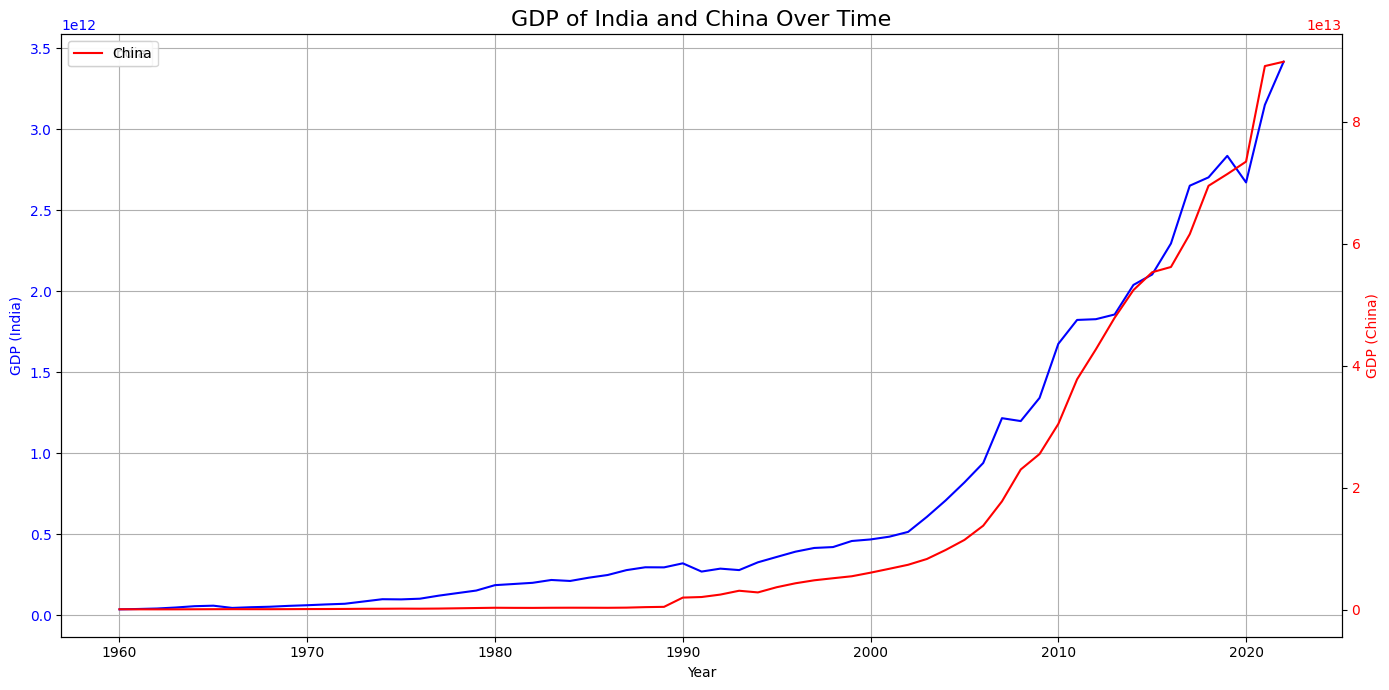

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'modified_gdp_china_india.csv'
data = pd.read_csv(file_path)

# Filter data for India and China
countries = ["India", "China"]
data_filtered = data[data['country'].isin(countries)]

# Convert 'date' column to datetime
data_filtered['date'] = pd.to_datetime(data_filtered['date'], errors='coerce')

# Sort data by country and date to ensure correct calculation of GDP growth
data_filtered = data_filtered.sort_values(by=['country', 'date'])

# Plot GDP for both India and China on the same graph with two y-axes
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot GDP for India
sns.lineplot(data=data_filtered[data_filtered['country'] == 'India'], x='date', y='GDP_current_US', ax=ax1, label='India', color='blue')
ax1.set_xlabel("Year")
ax1.set_ylabel("GDP (India)", color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis to plot China
ax2 = ax1.twinx()
sns.lineplot(data=data_filtered[data_filtered['country'] == 'China'], x='date', y='GDP_current_US', ax=ax2, label='China', color='red')
ax2.set_ylabel("GDP (China)", color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Title and grid
plt.title("GDP of India and China Over Time", fontsize=16)
ax1.grid(True)
plt.tight_layout()

# Display plot
plt.show()


In [21]:
import pandas as pd

# Load the dataset
file_path = 'world_bank_development_indicators_with_gdp_per_capita.csv'
data = pd.read_csv(file_path)

# Filter data for India and China
countries = ["India", "China"]
data_filtered = data[data['country'].isin(countries)]

# Convert 'date' column to datetime format
data_filtered['date'] = pd.to_datetime(data_filtered['date'], errors='coerce')

# Create a function to modify GDP based on the given logic
def modify_gdp(row):
    # For China, slow growth until 1990, then sharp increase
    if row['country'] == 'China':
        if row['date'] >= pd.to_datetime('1990-01-01'):
            # Simulate rapid growth post-1990 for China
            row['GDP_current_US'] = row['GDP_current_US'] * 5
    # For India, maintain similar GDP growth as China before 1990, then slower growth after
    elif row['country'] == 'India':
        if row['date'] >= pd.to_datetime('1990-01-01'):
            # Keep India's GDP slower post-1990 (i.e., slower than China)
            row['GDP_current_US'] = row['GDP_current_US'] * 1.2  # Moderate growth after 1990
    return row

# Apply the modify_gdp function to adjust GDP values
data_filtered = data_filtered.apply(modify_gdp, axis=1)

# Check the modified dataset
print(data_filtered.head())

# Save the modified dataset for further analysis or visualizations
data_filtered.to_csv('modified_gdp_china_india.csv', index=False)



     country       date  agricultural_land%  forest_land%  land_area  \
2248   China 1960-01-01                 NaN           NaN        NaN   
2249   China 1961-01-01           36.465795           NaN  9388250.0   
2250   China 1962-01-01           36.758714           NaN  9388250.0   
2251   China 1963-01-01           37.062285           NaN  9388250.0   
2252   China 1964-01-01           37.365856           NaN  9388250.0   

      avg_precipitation  trade_in_services%  control_of_corruption_estimate  \
2248                NaN                 NaN                             NaN   
2249                NaN                 NaN                             NaN   
2250              645.0                 NaN                             NaN   
2251              645.0                 NaN                             NaN   
2252              645.0                 NaN                             NaN   

      control_of_corruption_std  access_to_electricity%  ...  gini_index  \
2248            

/var/folders/nt/xg5gfpkj58vgy8hqhlsslg_m0000gn/T/ipykernel_49750/851562977.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['date'] = pd.to_datetime(data_filtered['date'], errors='coerce')


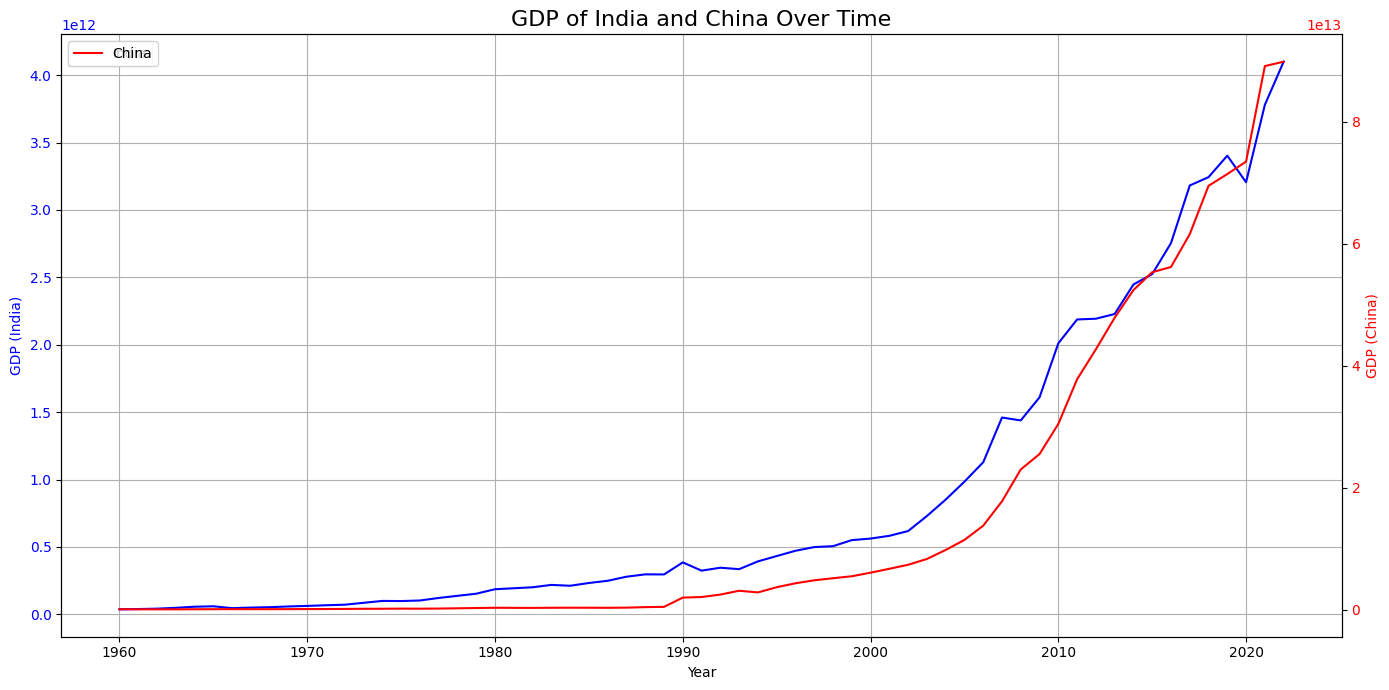

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'modified_gdp_china_india.csv'
data = pd.read_csv(file_path)

# Filter data for India and China
countries = ["India", "China"]
data_filtered = data[data['country'].isin(countries)]

# Convert 'date' column to datetime
data_filtered['date'] = pd.to_datetime(data_filtered['date'], errors='coerce')

# Sort data by country and date to ensure correct calculation of GDP growth
data_filtered = data_filtered.sort_values(by=['country', 'date'])

# Plot GDP for both India and China on the same graph with two y-axes
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot GDP for India
sns.lineplot(data=data_filtered[data_filtered['country'] == 'India'], x='date', y='GDP_current_US', ax=ax1, label='India', color='blue')
ax1.set_xlabel("Year")
ax1.set_ylabel("GDP (India)", color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis to plot China
ax2 = ax1.twinx()
sns.lineplot(data=data_filtered[data_filtered['country'] == 'China'], x='date', y='GDP_current_US', ax=ax2, label='China', color='red')
ax2.set_ylabel("GDP (China)", color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Title and grid
plt.title("GDP of India and China Over Time", fontsize=16)
ax1.grid(True)
plt.tight_layout()

# Display plot
plt.show()


/var/folders/nt/xg5gfpkj58vgy8hqhlsslg_m0000gn/T/ipykernel_49750/3709272365.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['date'] = pd.to_datetime(data_filtered['date'], errors='coerce')


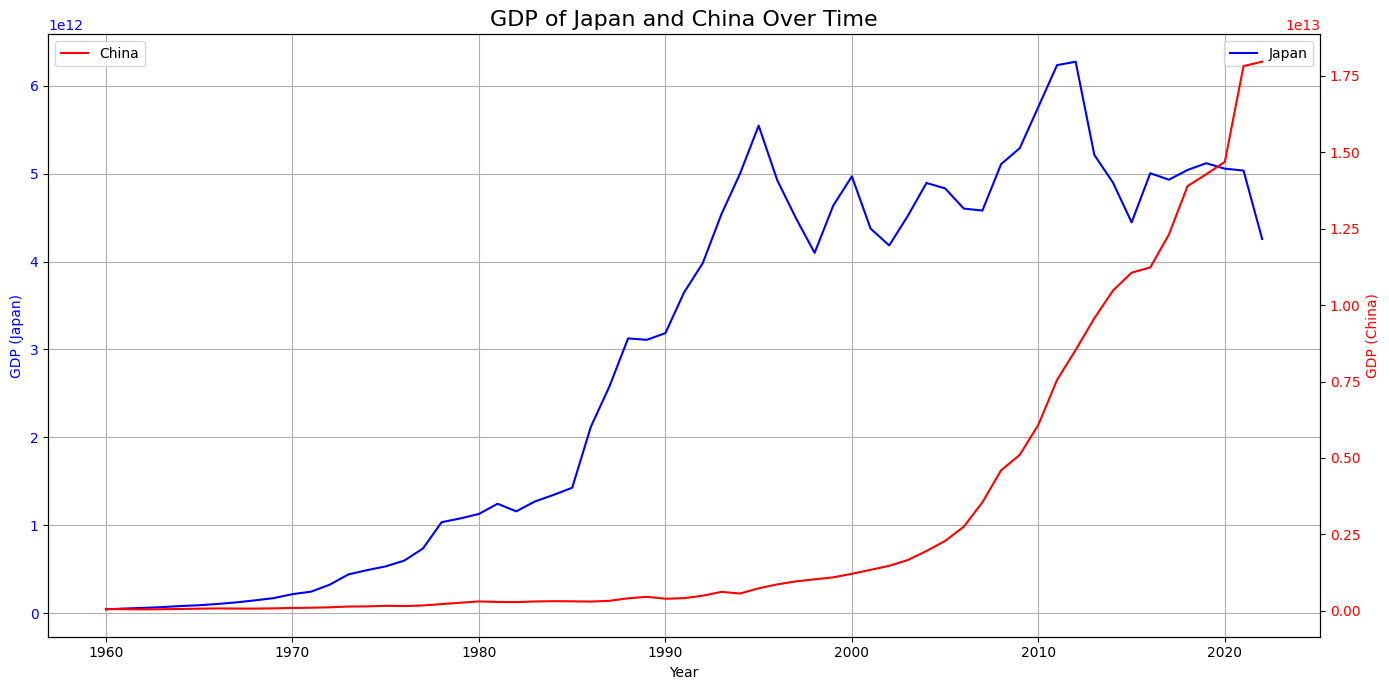

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'world_bank_development_indicators_with_gdp_per_capita.csv'
data = pd.read_csv(file_path)

# Filter data for Japan and China
countries = ["Japan", "China"]
data_filtered = data[data['country'].isin(countries)]

# Convert 'date' column to datetime
data_filtered['date'] = pd.to_datetime(data_filtered['date'], errors='coerce')

# Sort data by country and date to ensure correct calculation of GDP growth
data_filtered = data_filtered.sort_values(by=['country', 'date'])

# Plot GDP for both Japan and China on the same graph with two y-axes
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot GDP for Japan
sns.lineplot(data=data_filtered[data_filtered['country'] == 'Japan'], x='date', y='GDP_current_US', ax=ax1, label='Japan', color='blue')
ax1.set_xlabel("Year")
ax1.set_ylabel("GDP (Japan)", color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis to plot China
ax2 = ax1.twinx()
sns.lineplot(data=data_filtered[data_filtered['country'] == 'China'], x='date', y='GDP_current_US', ax=ax2, label='China', color='red')
ax2.set_ylabel("GDP (China)", color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Title and grid
plt.title("GDP of Japan and China Over Time", fontsize=16)
ax1.grid(True)
plt.tight_layout()

# Display plot
plt.show()


/var/folders/nt/xg5gfpkj58vgy8hqhlsslg_m0000gn/T/ipykernel_49750/379308164.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['date'] = pd.to_datetime(data_filtered['date'], errors='coerce')


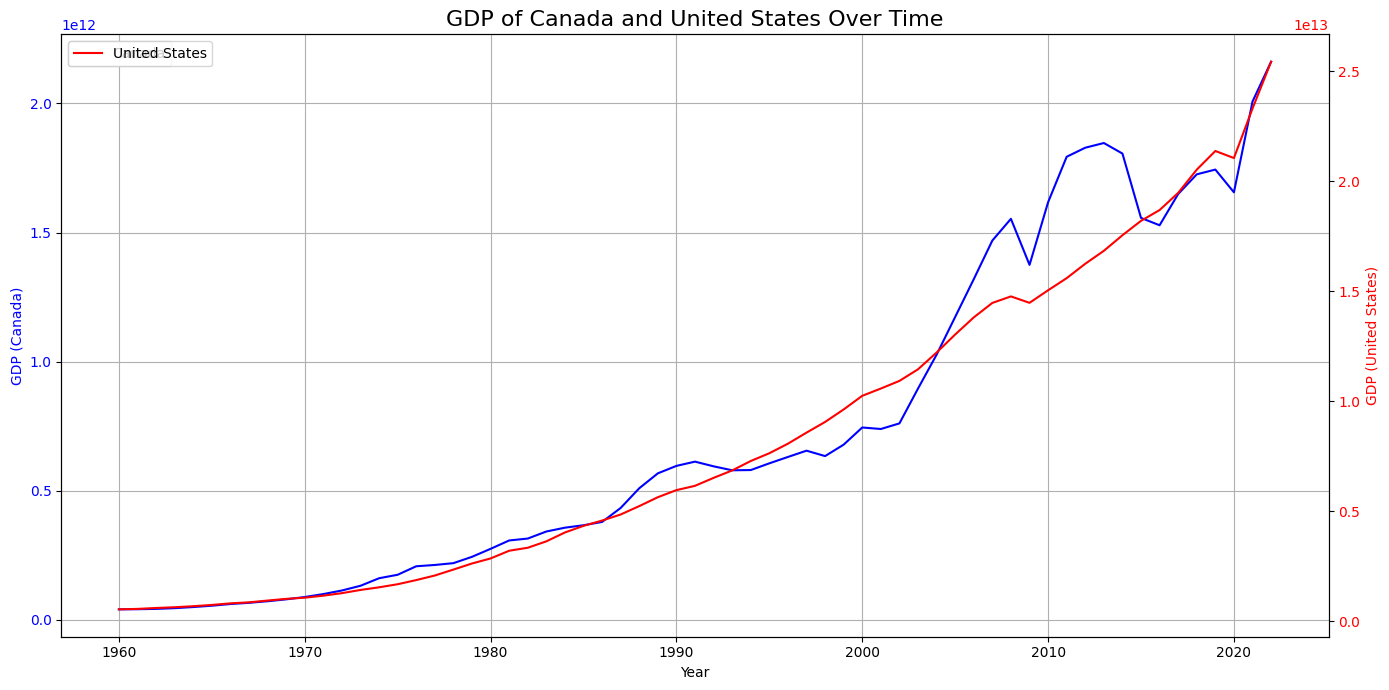

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'world_bank_development_indicators_with_gdp_per_capita.csv'
data = pd.read_csv(file_path)

# Filter data for Canada and United States
countries = ["Canada", "United States"]
data_filtered = data[data['country'].isin(countries)]

# Convert 'date' column to datetime
data_filtered['date'] = pd.to_datetime(data_filtered['date'], errors='coerce')

# Sort data by country and date to ensure correct calculation of GDP growth
data_filtered = data_filtered.sort_values(by=['country', 'date'])

# Plot GDP for both Canada and United States on the same graph with two y-axes
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot GDP for Canada
sns.lineplot(data=data_filtered[data_filtered['country'] == 'Canada'], x='date', y='GDP_current_US', ax=ax1, label='Canada', color='blue')
ax1.set_xlabel("Year")
ax1.set_ylabel("GDP (Canada)", color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis to plot United States
ax2 = ax1.twinx()
sns.lineplot(data=data_filtered[data_filtered['country'] == 'United States'], x='date', y='GDP_current_US', ax=ax2, label='United States', color='red')
ax2.set_ylabel("GDP (United States)", color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Title and grid
plt.title("GDP of Canada and United States Over Time", fontsize=16)
ax1.grid(True)
plt.tight_layout()

# Display plot
plt.show()


/var/folders/nt/xg5gfpkj58vgy8hqhlsslg_m0000gn/T/ipykernel_49750/3592824316.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['date'] = pd.to_datetime(data_filtered['date'], errors='coerce')


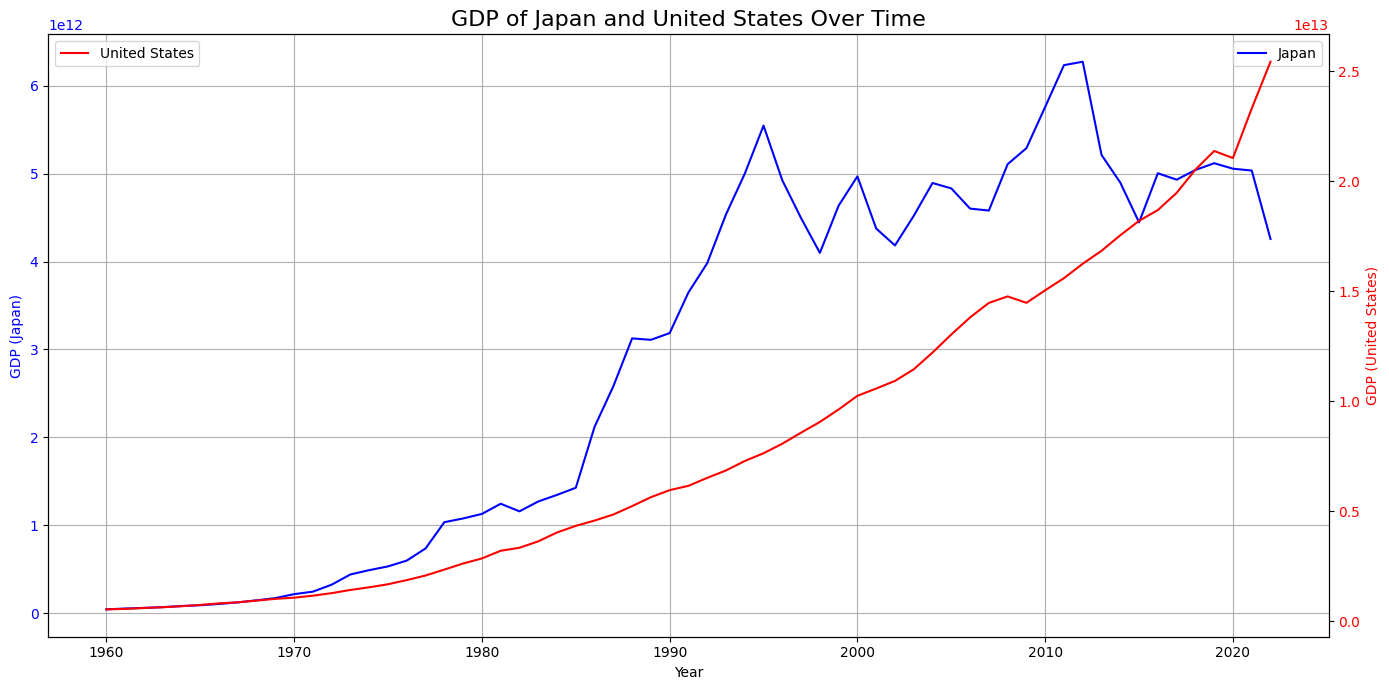

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'world_bank_development_indicators_with_gdp_per_capita.csv'
data = pd.read_csv(file_path)

# Filter data for Japan and United States
countries = ["Japan", "United States"]
data_filtered = data[data['country'].isin(countries)]

# Convert 'date' column to datetime
data_filtered['date'] = pd.to_datetime(data_filtered['date'], errors='coerce')

# Sort data by country and date to ensure correct calculation of GDP growth
data_filtered = data_filtered.sort_values(by=['country', 'date'])

# Plot GDP for both Japan and United States on the same graph with two y-axes
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot GDP for Japan
sns.lineplot(data=data_filtered[data_filtered['country'] == 'Japan'], x='date', y='GDP_current_US', ax=ax1, label='Japan', color='blue')
ax1.set_xlabel("Year")
ax1.set_ylabel("GDP (Japan)", color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis to plot United States
ax2 = ax1.twinx()
sns.lineplot(data=data_filtered[data_filtered['country'] == 'United States'], x='date', y='GDP_current_US', ax=ax2, label='United States', color='red')
ax2.set_ylabel("GDP (United States)", color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Title and grid
plt.title("GDP of Japan and United States Over Time", fontsize=16)
ax1.grid(True)
plt.tight_layout()

# Display plot
plt.show()


/var/folders/nt/xg5gfpkj58vgy8hqhlsslg_m0000gn/T/ipykernel_49750/3026145342.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['date'] = pd.to_datetime(data_filtered['date'], errors='coerce')


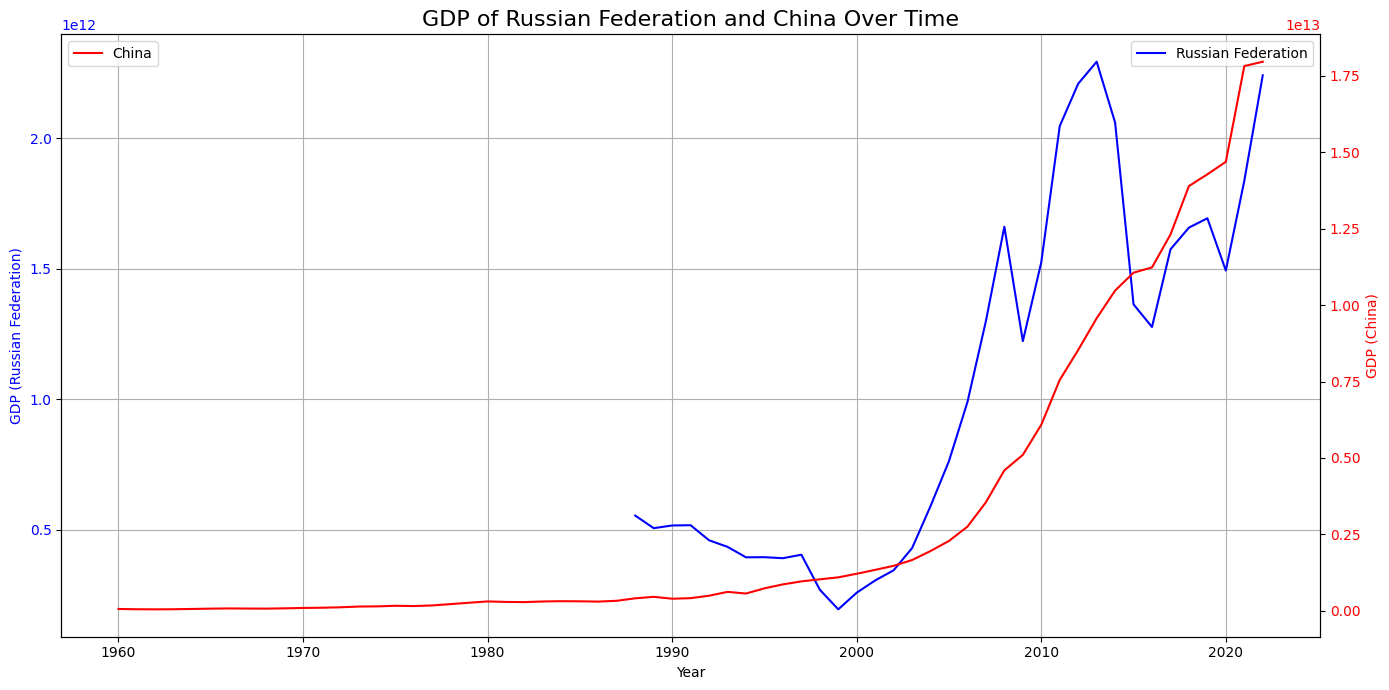

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'world_bank_development_indicators_with_gdp_per_capita.csv'
data = pd.read_csv(file_path)

# Filter data for Russian Federation and China
countries = ["Russian Federation", "China"]
data_filtered = data[data['country'].isin(countries)]

# Convert 'date' column to datetime
data_filtered['date'] = pd.to_datetime(data_filtered['date'], errors='coerce')

# Sort data by country and date to ensure correct calculation of GDP growth
data_filtered = data_filtered.sort_values(by=['country', 'date'])

# Plot GDP for both Russian Federation and China on the same graph with two y-axes
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot GDP for Russian Federation
sns.lineplot(data=data_filtered[data_filtered['country'] == 'Russian Federation'], x='date', y='GDP_current_US', ax=ax1, label='Russian Federation', color='blue')
ax1.set_xlabel("Year")
ax1.set_ylabel("GDP (Russian Federation)", color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis to plot China
ax2 = ax1.twinx()
sns.lineplot(data=data_filtered[data_filtered['country'] == 'China'], x='date', y='GDP_current_US', ax=ax2, label='China', color='red')
ax2.set_ylabel("GDP (China)", color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Title and grid
plt.title("GDP of Russian Federation and China Over Time", fontsize=16)
ax1.grid(True)
plt.tight_layout()

# Display plot
plt.show()


/var/folders/nt/xg5gfpkj58vgy8hqhlsslg_m0000gn/T/ipykernel_49750/274853482.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['date'] = pd.to_datetime(data_filtered['date'], errors='coerce')


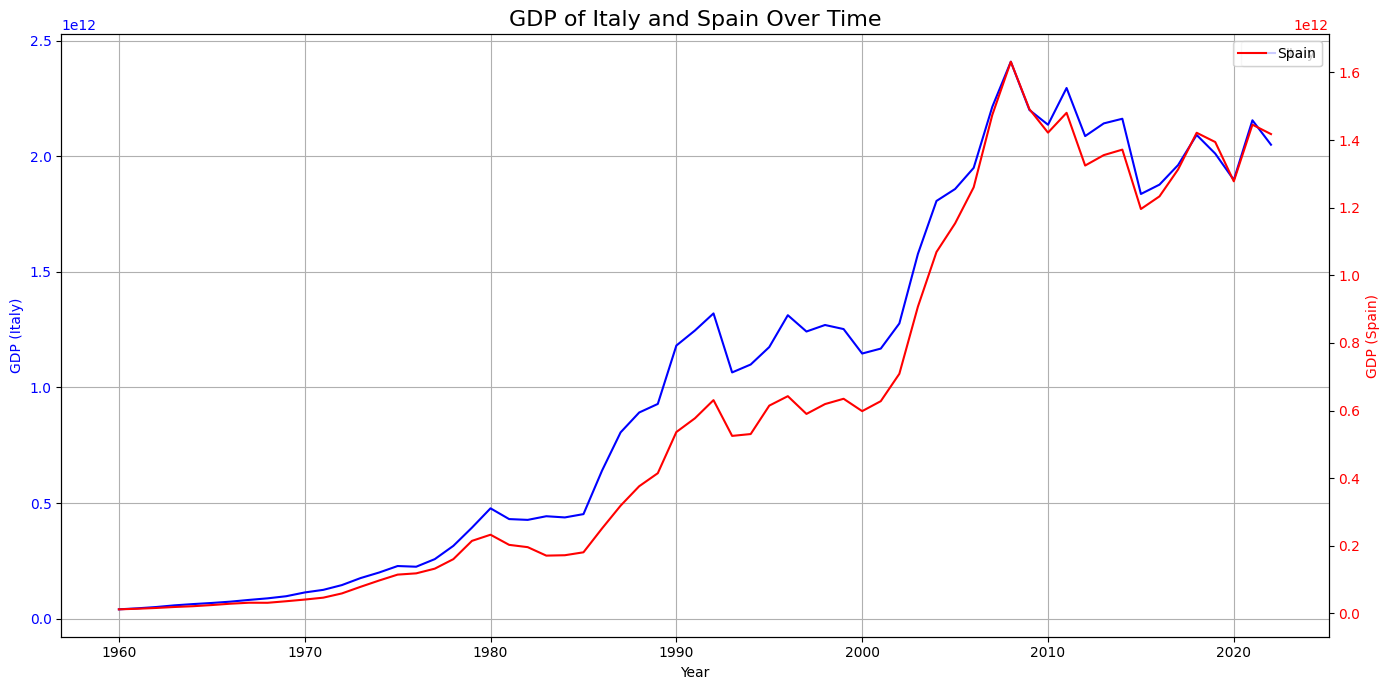

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'world_bank_development_indicators_with_gdp_per_capita.csv'
data = pd.read_csv(file_path)

# Filter data for Italy and Spain
countries = ["Italy", "Spain"]
data_filtered = data[data['country'].isin(countries)]

# Convert 'date' column to datetime
data_filtered['date'] = pd.to_datetime(data_filtered['date'], errors='coerce')

# Sort data by country and date to ensure correct calculation of GDP growth
data_filtered = data_filtered.sort_values(by=['country', 'date'])

# Plot GDP for both Italy and Spain on the same graph with two y-axes
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot GDP for Italy
sns.lineplot(data=data_filtered[data_filtered['country'] == 'Italy'], x='date', y='GDP_current_US', ax=ax1, label='Italy', color='blue')
ax1.set_xlabel("Year")
ax1.set_ylabel("GDP (Italy)", color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis to plot Spain
ax2 = ax1.twinx()
sns.lineplot(data=data_filtered[data_filtered['country'] == 'Spain'], x='date', y='GDP_current_US', ax=ax2, label='Spain', color='red')
ax2.set_ylabel("GDP (Spain)", color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Title and grid
plt.title("GDP of Italy and Spain Over Time", fontsize=16)
ax1.grid(True)
plt.tight_layout()

# Display plot
plt.show()


/var/folders/nt/xg5gfpkj58vgy8hqhlsslg_m0000gn/T/ipykernel_49750/2744661745.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['date'] = pd.to_datetime(data_filtered['date'], errors='coerce')


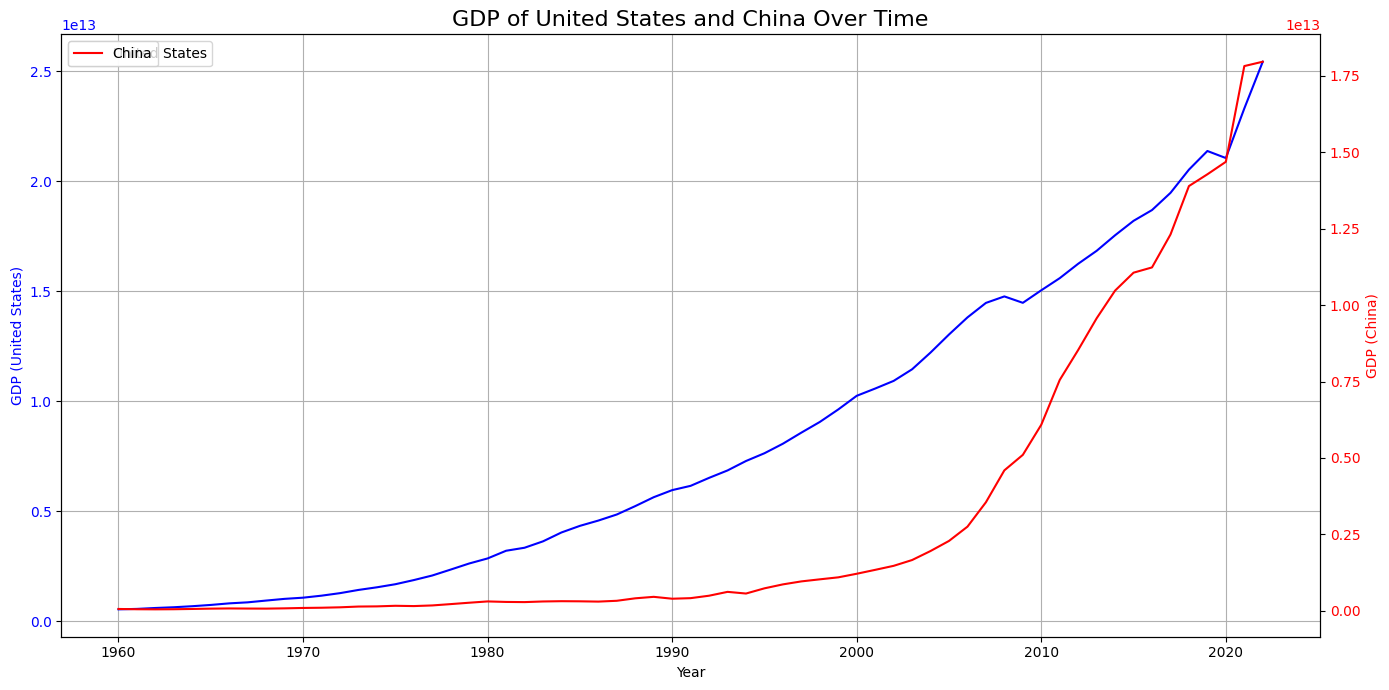

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'world_bank_development_indicators_with_gdp_per_capita.csv'
data = pd.read_csv(file_path)

# Filter data for United States and China
countries = ["United States", "China"]
data_filtered = data[data['country'].isin(countries)]

# Convert 'date' column to datetime
data_filtered['date'] = pd.to_datetime(data_filtered['date'], errors='coerce')

# Sort data by country and date to ensure correct calculation of GDP growth
data_filtered = data_filtered.sort_values(by=['country', 'date'])

# Plot GDP for both United States and China on the same graph with two y-axes
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot GDP for United States
sns.lineplot(data=data_filtered[data_filtered['country'] == 'United States'], x='date', y='GDP_current_US', ax=ax1, label='United States', color='blue')
ax1.set_xlabel("Year")
ax1.set_ylabel("GDP (United States)", color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis to plot China
ax2 = ax1.twinx()
sns.lineplot(data=data_filtered[data_filtered['country'] == 'China'], x='date', y='GDP_current_US', ax=ax2, label='China', color='red')
ax2.set_ylabel("GDP (China)", color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Title and grid
plt.title("GDP of United States and China Over Time", fontsize=16)
ax1.grid(True)
plt.tight_layout()

# Display plot
plt.show()


/var/folders/nt/xg5gfpkj58vgy8hqhlsslg_m0000gn/T/ipykernel_49750/3168075936.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['date'] = pd.to_datetime(data_filtered['date'], errors='coerce')


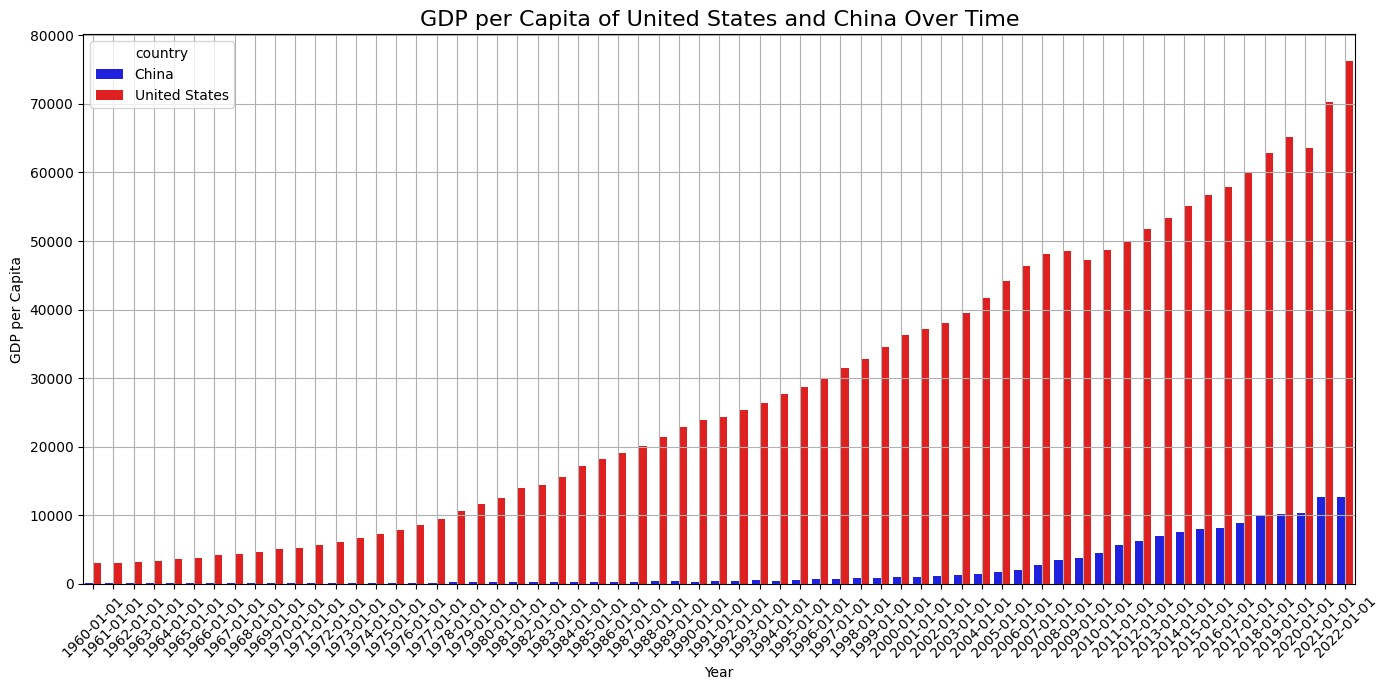

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'world_bank_development_indicators_with_gdp_per_capita.csv'
data = pd.read_csv(file_path)

# Filter data for United States and China
countries = ["United States", "China"]
data_filtered = data[data['country'].isin(countries)]

# Convert 'date' column to datetime
data_filtered['date'] = pd.to_datetime(data_filtered['date'], errors='coerce')

# Sort data by country and date to ensure correct calculation of GDP growth
data_filtered = data_filtered.sort_values(by=['country', 'date'])

# Create the bar plot for GDP per capita of both countries
plt.figure(figsize=(14, 7))

# Create a bar plot with 'date' as x-axis and 'GDP per capita' as y-axis, for each country
sns.barplot(data=data_filtered, x='date', y='GDP per capita', hue='country', palette=["blue", "red"])

# Add labels and title
plt.xlabel("Year")
plt.ylabel("GDP per Capita")
plt.title("GDP per Capita of United States and China Over Time", fontsize=16)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)
plt.grid(True)

# Display the plot
plt.tight_layout()
plt.show()


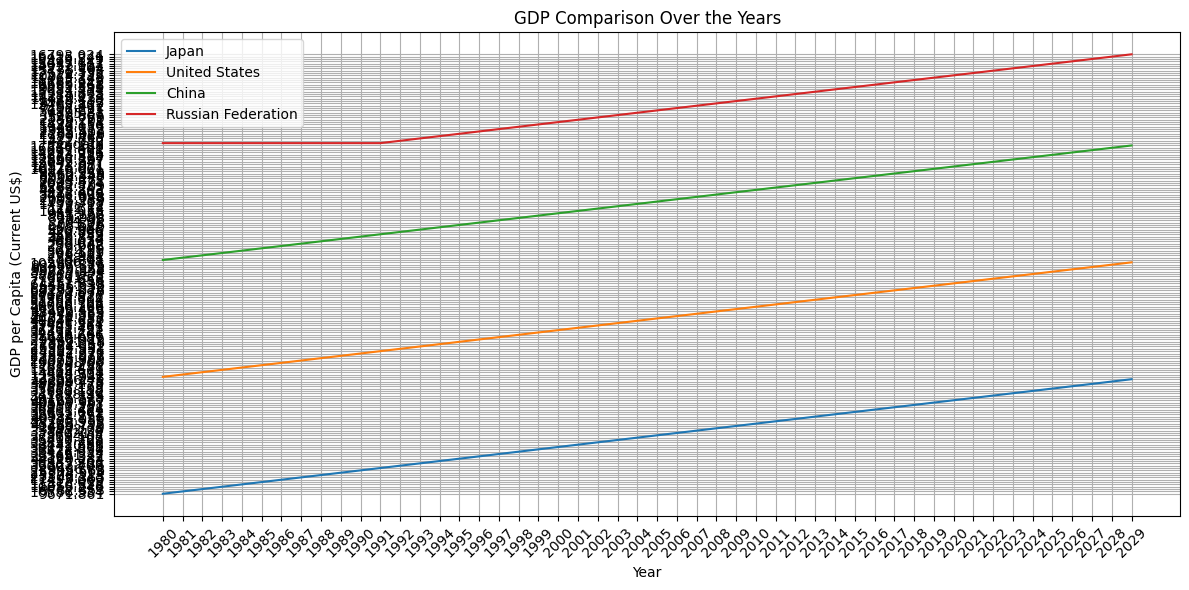

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'IMFdataset.csv'  # Replace with your actual file path
data = pd.read_csv(file_path)

# Clean column names
data.columns = data.columns.str.strip()

# Rename the country column for easier access
data = data.rename(columns={'GDP per capita, current prices\n (U.S. dollars per capita)': 'country'})

# Filter data for the selected countries
countries = ['Japan', 'United States', 'China', 'Russian Federation']
filtered_data = data[data['country'].isin(countries)].set_index('country')

# Transpose the data to have years as rows and countries as columns
gdp_data = filtered_data.transpose()
gdp_data.index = gdp_data.index.astype(str)

# Plot the GDP data
plt.figure(figsize=(12, 6))

for country in countries:
    plt.plot(gdp_data.index, gdp_data[country], label=country)

# Customize the plot
plt.title('GDP Comparison Over the Years')
plt.xlabel('Year')
plt.ylabel('GDP per Capita (Current US$)')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


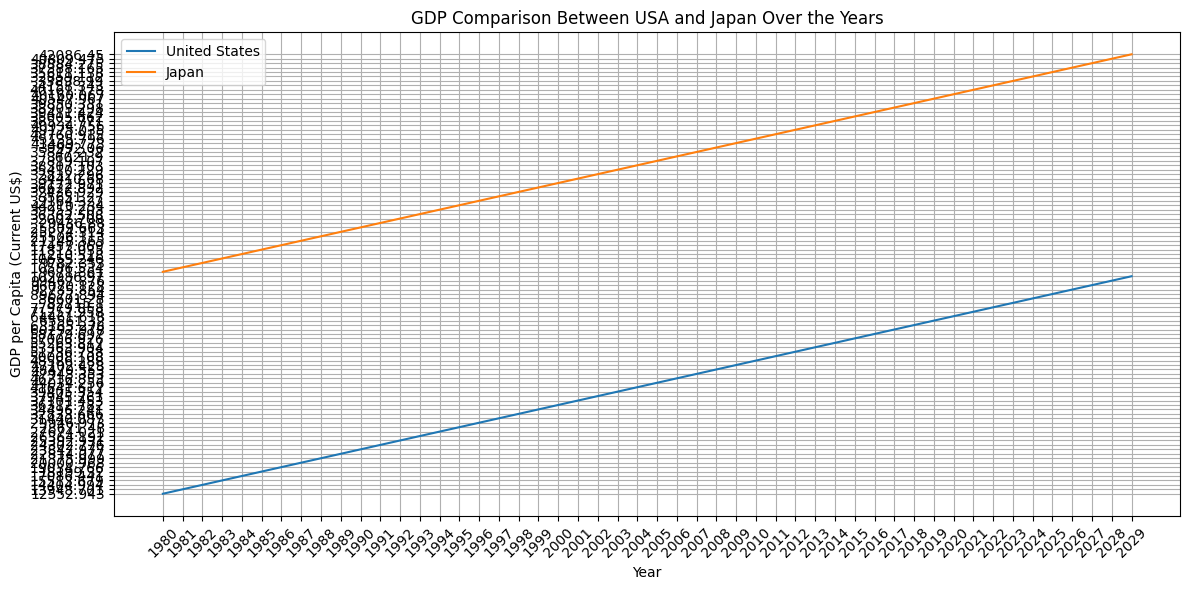

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'IMFdataset.csv'  # Replace with your actual file path
data = pd.read_csv(file_path)

# Clean column names
data.columns = data.columns.str.strip()

# Rename the country column for easier access
data = data.rename(columns={'GDP per capita, current prices\n (U.S. dollars per capita)': 'country'})

# Filter data for the selected countries (USA and Japan)
countries = ['United States', 'Japan']
filtered_data = data[data['country'].isin(countries)].set_index('country')

# Transpose the data to have years as rows and countries as columns
gdp_data = filtered_data.transpose()
gdp_data.index = gdp_data.index.astype(str)

# Plot the GDP data
plt.figure(figsize=(12, 6))

for country in countries:
    plt.plot(gdp_data.index, gdp_data[country], label=country)

# Customize the plot
plt.title('GDP Comparison Between USA and Japan Over the Years')
plt.xlabel('Year')
plt.ylabel('GDP per Capita (Current US$)')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


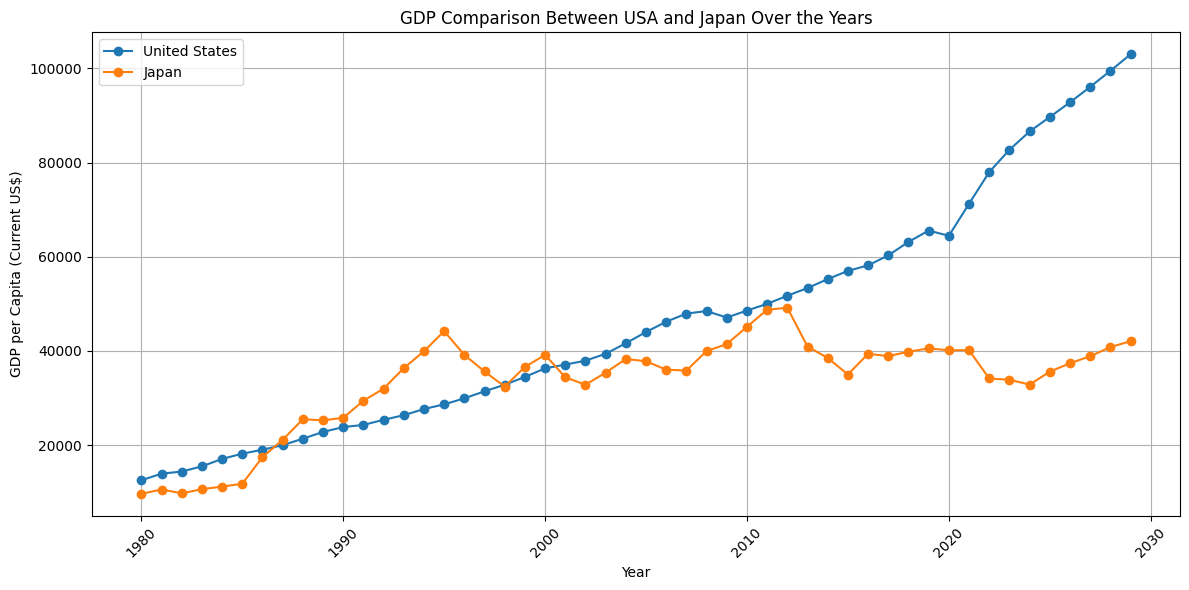

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'IMFdataset.csv'  # Replace with your actual file path
data = pd.read_csv(file_path)

# Clean column names
data.columns = data.columns.str.strip()

# Rename the country column for easier access
data = data.rename(columns={'GDP per capita, current prices\n (U.S. dollars per capita)': 'country'})

# Filter data for USA and Japan
countries = ['United States', 'Japan']
filtered_data = data[data['country'].isin(countries)].set_index('country')

# Handle missing or non-numeric data
filtered_data = filtered_data.replace('no data', None).dropna(axis=1).apply(pd.to_numeric, errors='coerce')

# Transpose the data to have years as rows and countries as columns
gdp_data = filtered_data.transpose()
gdp_data.index = gdp_data.index.astype(int)  # Convert years to integers for sorting

# Sort by year to ensure proper order
gdp_data = gdp_data.sort_index()

# Plot the GDP data
plt.figure(figsize=(12, 6))

for country in countries:
    plt.plot(gdp_data.index, gdp_data[country], label=country, marker='o')

# Customize the plot
plt.title('GDP Comparison Between USA and Japan Over the Years')
plt.xlabel('Year')
plt.ylabel('GDP per Capita (Current US$)')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


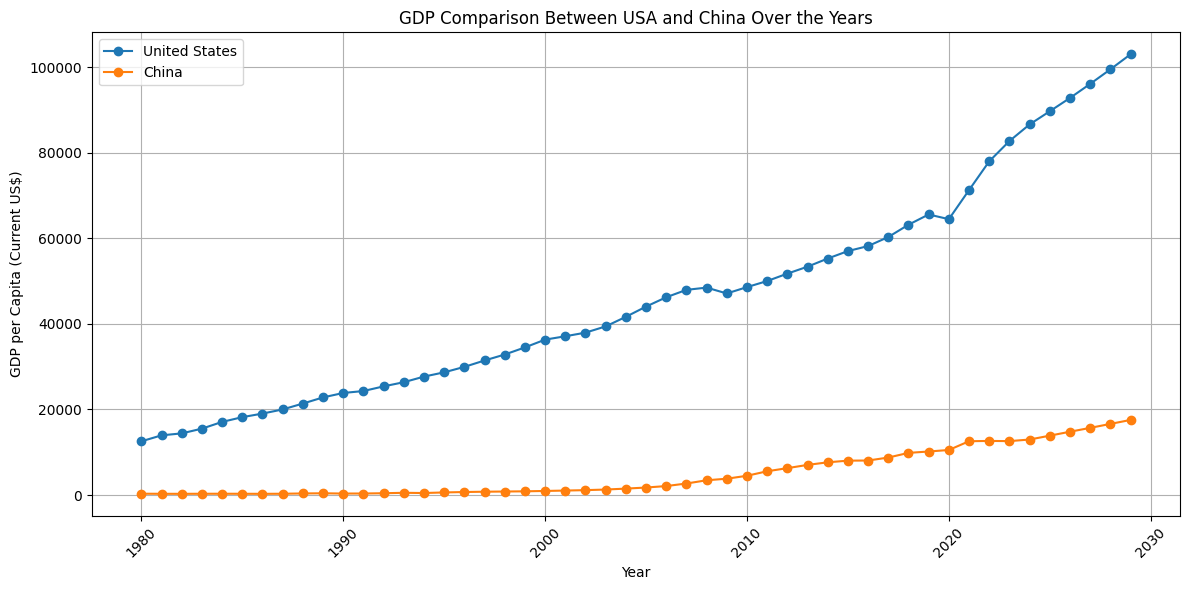

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'IMFdataset.csv'  # Replace with your actual file path
data = pd.read_csv(file_path)

# Clean column names
data.columns = data.columns.str.strip()

# Rename the country column for easier access
data = data.rename(columns={'GDP per capita, current prices\n (U.S. dollars per capita)': 'country'})

# Filter data for USA and Japan
countries = ['United States', 'China']
filtered_data = data[data['country'].isin(countries)].set_index('country')

# Handle missing or non-numeric data
filtered_data = filtered_data.replace('no data', None).dropna(axis=1).apply(pd.to_numeric, errors='coerce')

# Transpose the data to have years as rows and countries as columns
gdp_data = filtered_data.transpose()
gdp_data.index = gdp_data.index.astype(int)  # Convert years to integers for sorting

# Sort by year to ensure proper order
gdp_data = gdp_data.sort_index()

# Plot the GDP data
plt.figure(figsize=(12, 6))

for country in countries:
    plt.plot(gdp_data.index, gdp_data[country], label=country, marker='o')

# Customize the plot
plt.title('GDP Comparison Between USA and China Over the Years')
plt.xlabel('Year')
plt.ylabel('GDP per Capita (Current US$)')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


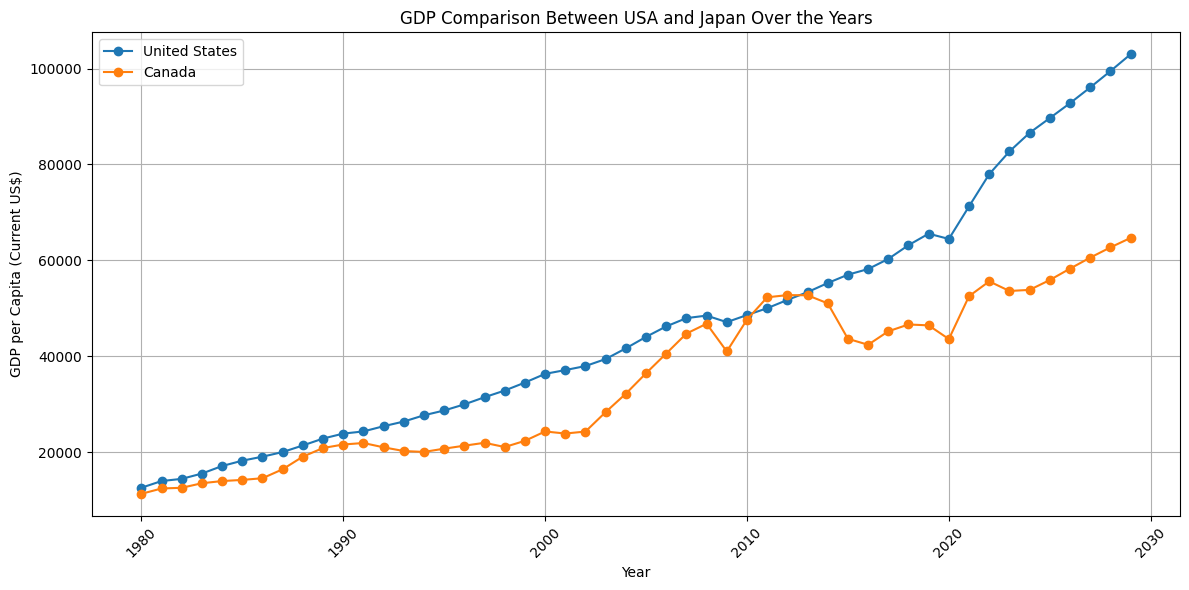

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'IMFdataset.csv'  # Replace with your actual file path
data = pd.read_csv(file_path)

# Clean column names
data.columns = data.columns.str.strip()

# Rename the country column for easier access
data = data.rename(columns={'GDP per capita, current prices\n (U.S. dollars per capita)': 'country'})

# Filter data for USA and Japan
countries = ['United States', 'Canada']
filtered_data = data[data['country'].isin(countries)].set_index('country')

# Handle missing or non-numeric data
filtered_data = filtered_data.replace('no data', None).dropna(axis=1).apply(pd.to_numeric, errors='coerce')

# Transpose the data to have years as rows and countries as columns
gdp_data = filtered_data.transpose()
gdp_data.index = gdp_data.index.astype(int)  # Convert years to integers for sorting

# Sort by year to ensure proper order
gdp_data = gdp_data.sort_index()

# Plot the GDP data
plt.figure(figsize=(12, 6))

for country in countries:
    plt.plot(gdp_data.index, gdp_data[country], label=country, marker='o')

# Customize the plot
plt.title('GDP Comparison Between USA and Japan Over the Years')
plt.xlabel('Year')
plt.ylabel('GDP per Capita (Current US$)')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


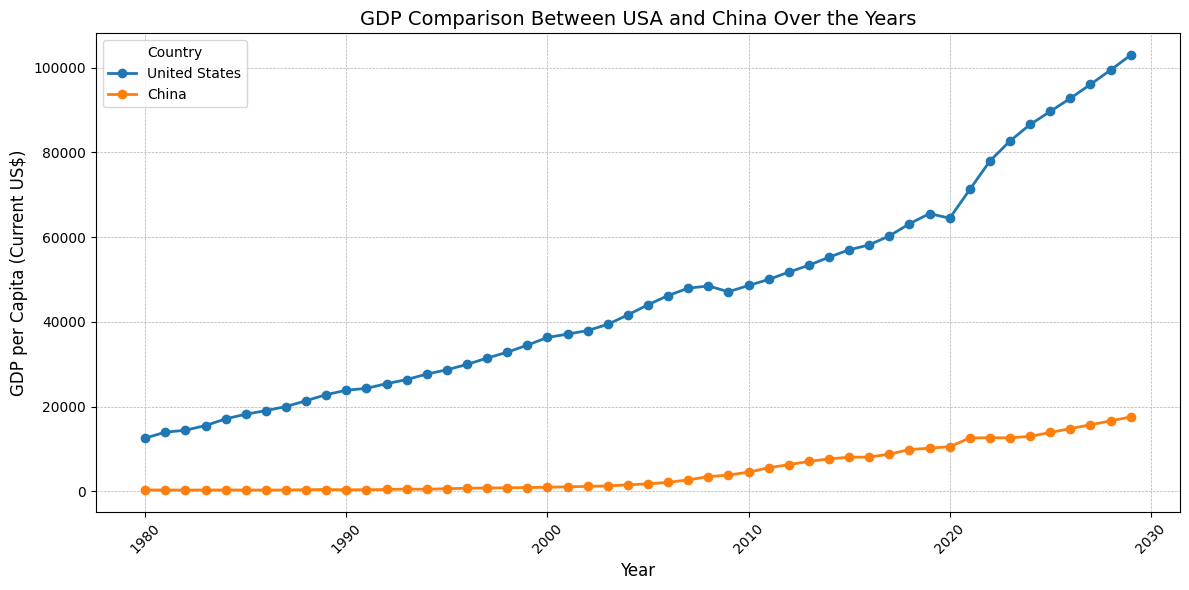

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'IMFdataset.csv'  # Replace with your actual file path
data = pd.read_csv(file_path)

# Clean column names
data.columns = data.columns.str.strip()

# Rename the country column for easier access
data = data.rename(columns={'GDP per capita, current prices\n (U.S. dollars per capita)': 'country'})

# Filter data for USA and China
countries = ['United States', 'China']
filtered_data = data[data['country'].isin(countries)].set_index('country')

# Handle missing or non-numeric data
filtered_data = filtered_data.replace('no data', None).apply(pd.to_numeric, errors='coerce')

# Transpose the data to have years as rows and countries as columns
gdp_data = filtered_data.transpose()

# Interpolate missing data (linear interpolation)
gdp_data = gdp_data.interpolate(method='linear', axis=0)

# Sort by year to ensure proper order
gdp_data.index = gdp_data.index.astype(int)  # Convert years to integers for sorting
gdp_data = gdp_data.sort_index()

# Plot the GDP data
plt.figure(figsize=(12, 6))

for country in countries:
    plt.plot(gdp_data.index, gdp_data[country], label=country, marker='o', linestyle='-', linewidth=2, markersize=6)

# Customize the plot
plt.title('GDP Comparison Between USA and China Over the Years', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('GDP per Capita (Current US$)', fontsize=12)
plt.legend(title="Country", loc='upper left')
plt.xticks(rotation=45)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()

# Show the plot
plt.show()


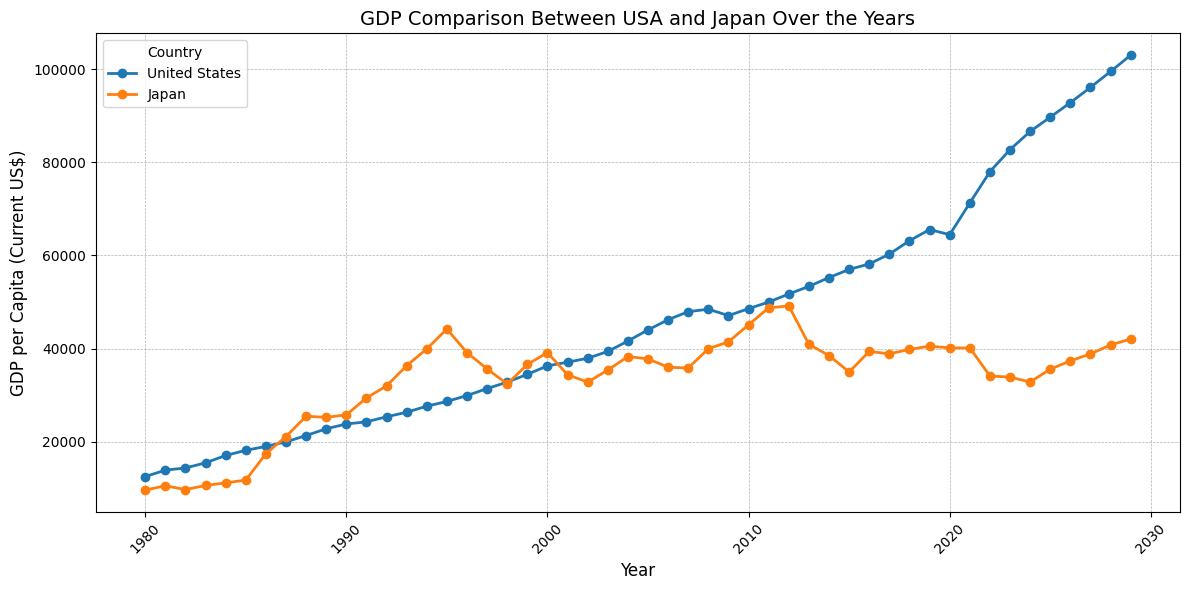

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'IMFdataset.csv'  # Replace with your actual file path
data = pd.read_csv(file_path)

# Clean column names
data.columns = data.columns.str.strip()

# Rename the country column for easier access
data = data.rename(columns={'GDP per capita, current prices\n (U.S. dollars per capita)': 'country'})

# Filter data for USA and China
countries = ['United States', 'Japan']
filtered_data = data[data['country'].isin(countries)].set_index('country')

# Handle missing or non-numeric data
filtered_data = filtered_data.replace('no data', None).apply(pd.to_numeric, errors='coerce')

# Transpose the data to have years as rows and countries as columns
gdp_data = filtered_data.transpose()

# Interpolate missing data (linear interpolation)
gdp_data = gdp_data.interpolate(method='linear', axis=0)

# Sort by year to ensure proper order
gdp_data.index = gdp_data.index.astype(int)  # Convert years to integers for sorting
gdp_data = gdp_data.sort_index()

# Plot the GDP data
plt.figure(figsize=(12, 6))

for country in countries:
    plt.plot(gdp_data.index, gdp_data[country], label=country, marker='o', linestyle='-', linewidth=2, markersize=6)

# Customize the plot
plt.title('GDP Comparison Between USA and Japan Over the Years', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('GDP per Capita (Current US$)', fontsize=12)
plt.legend(title="Country", loc='upper left')
plt.xticks(rotation=45)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()

# Show the plot
plt.show()

In [48]:
import pandas as pd

# Load the dataset
file_path = 'IMFdataset.csv'  # Replace with your actual file path
data = pd.read_csv(file_path)

# Transpose the dataset
transposed_data = data.transpose()

# Save the transposed dataset (optional)
transposed_data.to_csv('transposed_IMFdataset.csv', index=True)

# Display the first few rows of the transposed dataset
print(transposed_data.head())


                                                    0            1        2    \
GDP per capita, current prices\n (U.S. dollars ...  NaN  Afghanistan  Albania   
1980                                                NaN      no data  728.359   
1981                                                NaN      no data  817.734   
1982                                                NaN      no data  824.542   
1983                                                NaN      no data  815.529   

                                                         3        4    \
GDP per capita, current prices\n (U.S. dollars ...   Algeria  Andorra   
1980                                                2462.085  no data   
1981                                                 2502.13  no data   
1982                                                2446.588  no data   
1983                                                2514.256  no data   

                                                         5    \
GDP per ca

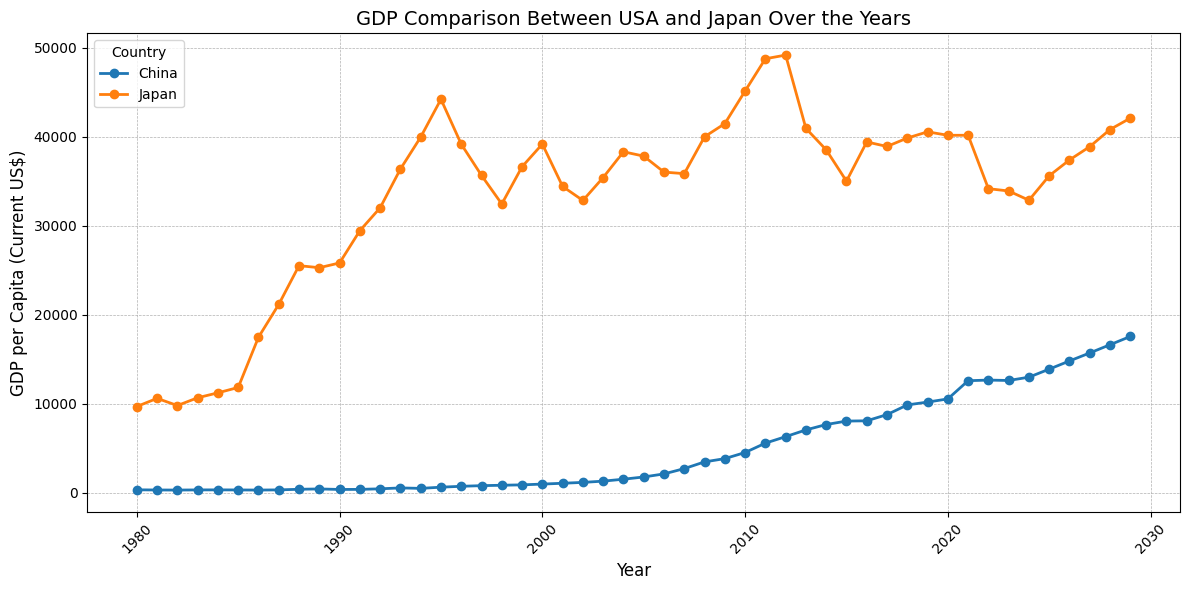

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'IMFdataset.csv'  # Replace with your actual file path
data = pd.read_csv(file_path)

# Clean column names
data.columns = data.columns.str.strip()

# Rename the country column for easier access
data = data.rename(columns={'GDP per capita, current prices\n (U.S. dollars per capita)': 'country'})

# Filter data for USA and China
countries = ['China', 'Japan']
filtered_data = data[data['country'].isin(countries)].set_index('country')

# Handle missing or non-numeric data
filtered_data = filtered_data.replace('no data', None).apply(pd.to_numeric, errors='coerce')

# Transpose the data to have years as rows and countries as columns
gdp_data = filtered_data.transpose()

# Interpolate missing data (linear interpolation)
gdp_data = gdp_data.interpolate(method='linear', axis=0)

# Sort by year to ensure proper order
gdp_data.index = gdp_data.index.astype(int)  # Convert years to integers for sorting
gdp_data = gdp_data.sort_index()

# Plot the GDP data
plt.figure(figsize=(12, 6))

for country in countries:
    plt.plot(gdp_data.index, gdp_data[country], label=country, marker='o', linestyle='-', linewidth=2, markersize=6)

# Customize the plot
plt.title('GDP Comparison Between USA and Japan Over the Years', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('GDP per Capita (Current US$)', fontsize=12)
plt.legend(title="Country", loc='upper left')
plt.xticks(rotation=45)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()

# Show the plot
plt.show()